In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=500,centers = 5 , random_state = 3)

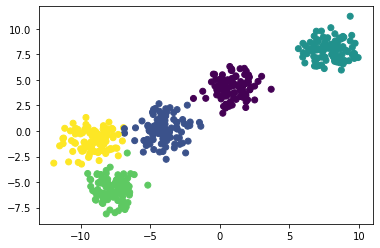

In [3]:
fig = plt.plot()
plt.grid = True
plt.scatter(X[:,0],X[:,1], c= y)
plt.show()

In [4]:
k = 5

colors = ['green','yellow','blue','cyan','red']

clusters = {}

for idx in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : [],
        'color'  : colors[idx]
    }
    
    clusters[idx] = cluster 

In [5]:
clusters

{0: {'center': array([-2.48705328,  7.86607874]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 3.06229558, -8.90361597]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-0.23910919,  6.08539035]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([9.82101472, 2.14021124]), 'points': [], 'color': 'cyan'},
 4: {'center': array([-0.70285146,  6.91728663]),
  'points': [],
  'color': 'red'}}

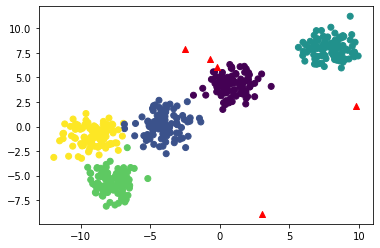

In [6]:
plt.scatter(X[:,0],X[:,1], c= y)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = "^", c= 'red')
plt.show()

In [7]:
def distance(v1,v2):
    return np.sqrt(sum((v1-v2)**2))

In [8]:
v1 = np.array([1,2])
v2 = np.array([3,4])
distance(v1,v2)

2.8284271247461903

In [9]:
# Implementing The E step

def assign_clusters() :
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

# Implementing M step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0]>0:
            new_centers = pts.mean(axis=0)
            clusters[idx]['center'] = new_centers
            clusters[idx]['points'] = []
            
            
        
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try :
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c='black', marker = "^")        
        


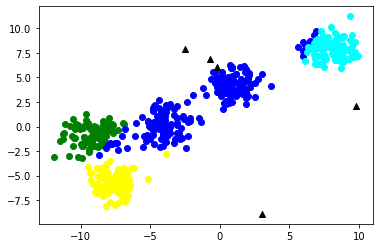

In [10]:
assign_clusters()
plot_clusters()
update_clusters()